# Decision Trees In the Interview

## Objectives
By the end of this lecture we want you to be able to...
* Identify when you use a decision tree
* Draw all 4 categorical/continuous decision tree feature pairings by hand
* Verbalize decision tree algorithm
* Describe 

## Interview problem

But it's the kind of question you'd get in an interview. 

You probably won't be able to answer this yet. So I'll ask it now, and we'll come back to it at the end. 

[show the red/blue x data set]

What will the next split of a decision tree be here?

## When to use a decision tree

Imagine all you know is linear regression.

And you need to predict y (weights I lift) given X (amount of friends watching).

[insert graph of linear regression on a stepwise function]

In [27]:
from scipy.stats import norm, binom
import matplotlib.pyplot as plt

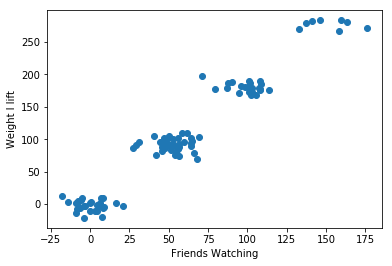

In [83]:
noise = norm(0,.2).rvs([100,1])
X1 = binom(3,.4).rvs([100,1])
error = norm(0,10).rvs([100,1])
y = X1*90+error
X = (X1+noise)*50

fig, ax = plt.subplots()
ax.scatter(X, y)
ax.set_ylabel('Weight I lift')
ax.set_xlabel('Friends Watching');

This is a time to NOT use linear regression. 
(Sure, you could use data engineering here, but that's so manual!!!) 

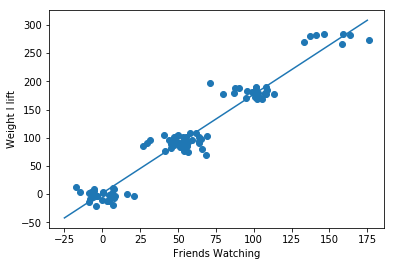

In [87]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
x_horiz = np.linspace(-25,175,1000).reshape(-1,1)
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(x_horiz, lr.predict(x_horiz))
ax.set_ylabel('Weight I lift')
ax.set_xlabel('Friends Watching');

So instead lets look at this!

So! what might we use instead if we could do this by hand?

<img src="img/dt_3_split.png" width="300">

I would argue that that process is best approximated by a decision tree.

But let's do this more formally

What procedure can we use to get it right every time?

* while not completely fit tree:
    * split visually
    * record choice in a drawn "Tree"

I'll do the same more formally now. 


<img src="img/Data.png" width="300">
<img src="img/dt_1_split.png" width="300">
<img src="img/dt_2_split.png" width="300">
<img src="img/dt_3_split.png" width="300">
<img src="img/hand_drawn_tree.jpg" width="300">

## Exercise

Ok, now you do one. 

* open this: [Awwwapp link](https://awwapp.com/#)
* Right Click, and 'save as' this image and drop drop it into awwwapp: 

<img src="img/Sample_data.png" width="700">


Click this link to see the answer: [dt_split_answer.png](dt_split_answer.png)

## Cost function

So lets talk about that 'visual' splitting thing.

Well I would argue that what you mostly did there was notice the distance of the data points from the mean y_hat of all data points in that branch of the tree. So let's do that more formally. Let's draw a line, and imagine minimizing the distances of this line. 

$\operatorname{RSS} = \sum_{i=1}^n (y_i - f(x_i))^2$

<img src="img/RSS_big.jpg" width='200'>
<img src="img/RSS_medium.jpg" width='200'>
<img src="img/RSS_small.jpg" width='200'>


[live code looking at the first split on the final dataset]

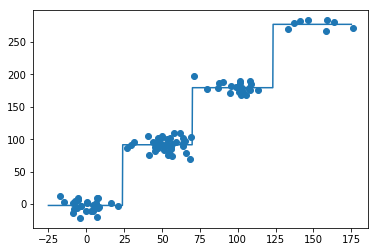

In [94]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_leaf_nodes=4)
dtr.fit(X,y)
x_horiz = np.linspace(-25,175,1000).reshape(-1,1)
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(x_horiz, dtr.predict(x_horiz))

Oh hey, look! The splits in order

In [95]:
dtr.tree_.threshold

array([ 70.0187149 ,  23.93189621, 123.24713135,  -2.        ,
        -2.        ,  -2.        ,  -2.        ])

## Pros
* can capture non-linear
* can capture feature interactivity
* fast. 
* VERY explainable

## Cons
* overfits _easily_


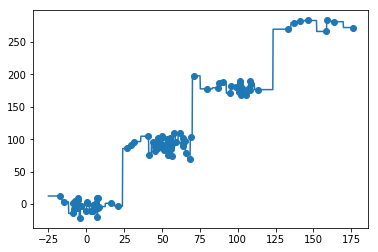

In [96]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X,y)
x_horiz = np.linspace(-25,175,1000).reshape(-1,1)
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(x_horiz, dtr.predict(x_horiz))

Counter examples:
More Bad when there are lines!
And yet... 
[insert a tree with zigzag splits]

So let's finish looking at our original problem statement. 